In [1]:
from pyforest import *

In [2]:
train = pd.read_csv("Train.csv",sep=",")
test = pd.read_csv("Test.csv",sep=",")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


### Step to Modelling

1.Problem Statement

2.Hypothesis Generation

3.Exploratory Data Anlysis

    3.1. Univariate Analysis
    
    3.2. Bivariate or Multivariate Anlysis

    3.3. Missing Values Treatment

    3.4. Outlier Identification

    3.5. Feature Engineering

    3.6. Standardization - last step of EDA also known as Data Pre-Processing

4. Applying Machine Learning Models

### Exploratory Data Analysis

1. Univariate Analysis

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sns.distplot(train.Item_Outlet_Sales, color= "m")
plt.show()
#Item_Outlet_Sales is Positively Skewed

<Figure size 640x480 with 1 Axes>

In [7]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

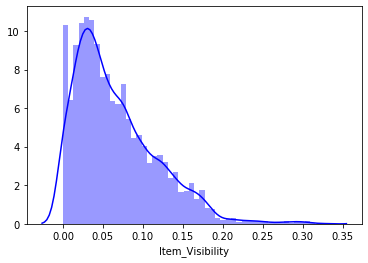

In [11]:
sns.distplot(train.Item_Visibility, color = "b")
plt.show()

#visibility is Higher for lot of items

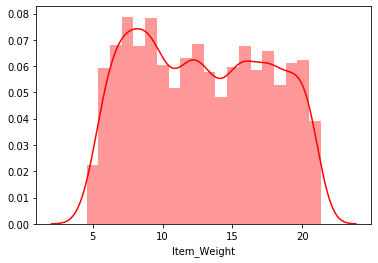

In [12]:
sns.distplot(train.Item_Weight.dropna(), color = "r")
plt.show()

# Not much of pattern-- needs Exploring

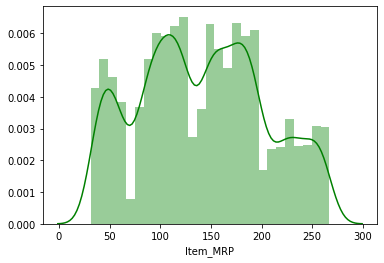

In [13]:
sns.distplot(train.Item_MRP, color= "g")
plt.show()

#MRP appears to have 04 different dist/ values

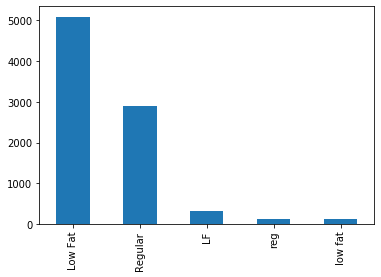

In [14]:
#Item Fat Content
train.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

In [14]:
# Replacement of LF and low fat
train.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)

In [20]:
# Replacing reg into Regular
train.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

In [23]:
# Replacement of LF and low fat
test.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)

In [22]:
# Replacing reg into Regular
test.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

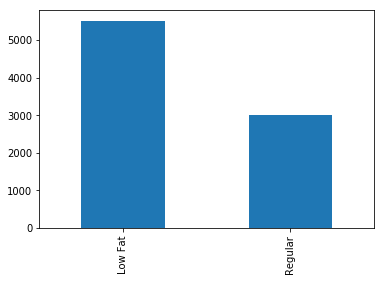

In [16]:
train.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

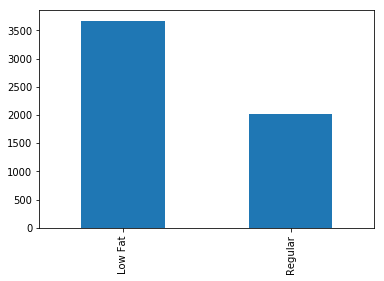

In [24]:
test.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

In [25]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


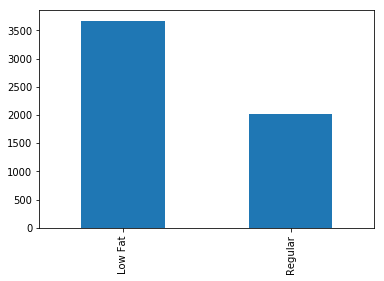

In [26]:
test.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

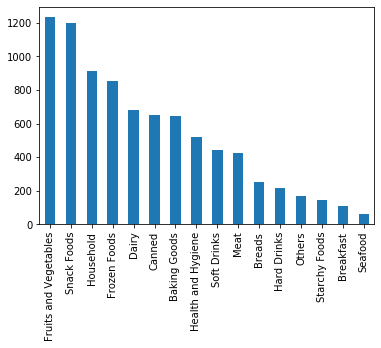

In [21]:
train.Item_Type.value_counts().plot(kind="bar")
plt.show()

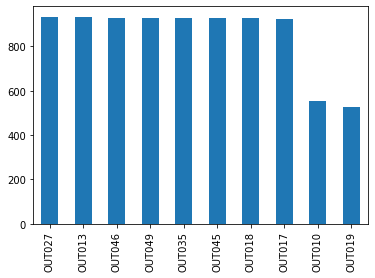

In [22]:
#Outlet_Identifier
train.Outlet_Identifier.value_counts().plot(kind="bar")
plt.show()

# less frequency count is out 10 and out 19

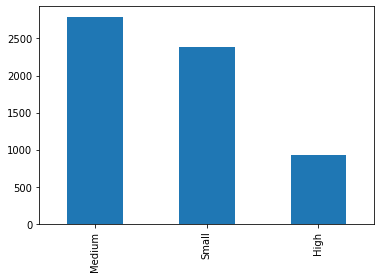

In [23]:
#Outlet_Size
train.Outlet_Size.value_counts().plot(kind="bar")
plt.show()

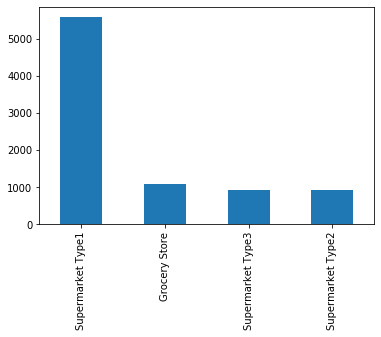

In [24]:
#Outlet Type
train.Outlet_Type.value_counts().plot(kind="bar")
plt.show()

#

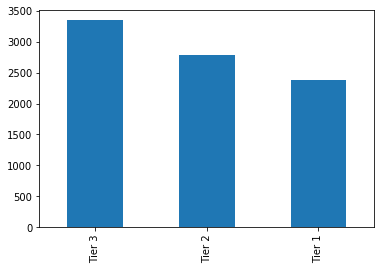

In [25]:
# Outlet_Location_Type

train.Outlet_Location_Type.value_counts().plot(kind="bar")
plt.show()

### Bivariate Analysis

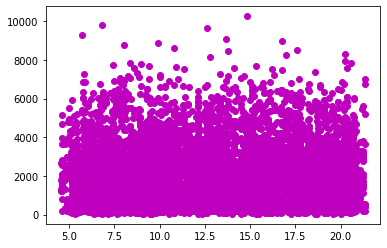

In [26]:
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = "m")
plt.show()

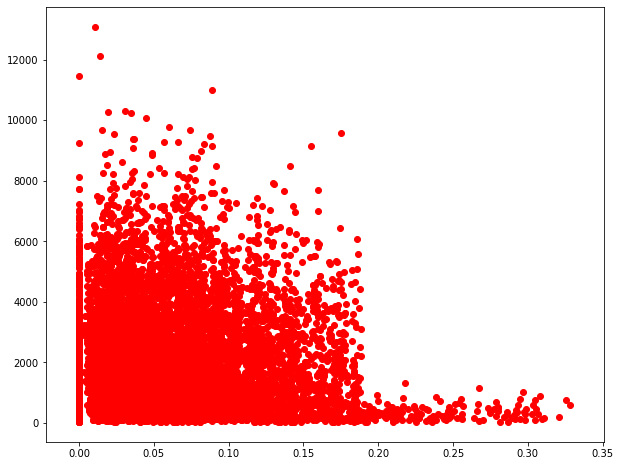

In [27]:
plt.figure(figsize = [10,8])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "r")
plt.show()

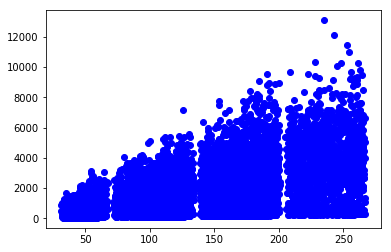

In [11]:
#plt.figure(figsize = [10,8])
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "b")
plt.show()
#this represent the collection of prices together
# so can calculate price per unit

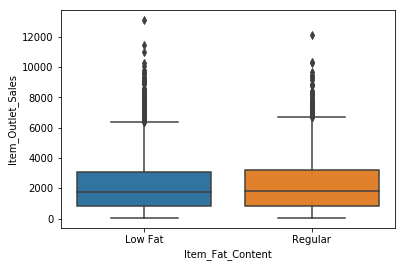

In [12]:
# categorical vs. Numerical


sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

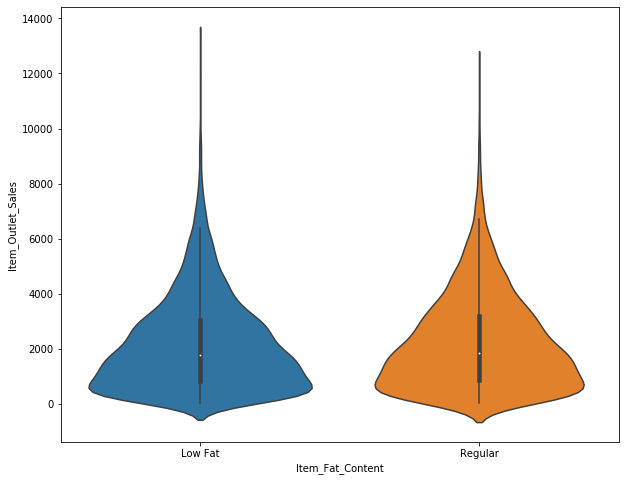

In [30]:
plt.figure(figsize = [10,8])
sns.violinplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

In [13]:

train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


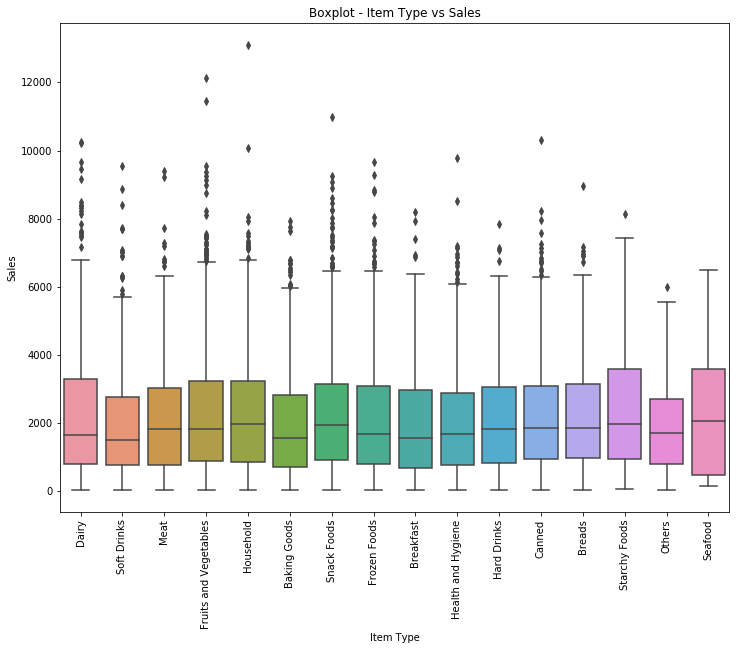

In [32]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Item Type vs Sales")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()

#refer ANOVA for Furthur

In [14]:

train.groupby("Item_Type")["Item_Outlet_Sales"].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,1952.971207,2204.132226,2111.808651,2225.194904,2232.542597,2132.867744,2289.009592,2139.221622,2010.000265,2258.784300,2158.977911,1926.139702,2326.065928,2277.321739,2006.511735,2374.332773
std,1546.788045,1644.235914,1911.693586,1645.235638,1884.404698,1724.777720,1799.503459,1606.191587,1553.633063,1692.245757,1695.231081,1431.860471,1842.988719,1705.121755,1674.249752,1773.945328
min,37.284800,35.287400,39.948000,37.950600,40.613800,36.619000,45.274400,37.950600,34.621600,33.290000,47.937600,39.948000,149.805000,33.955800,33.290000,58.590400
25%,705.082200,968.739000,679.116000,952.094000,788.973000,808.947000,884.848200,834.913200,758.845550,853.389150,782.980800,790.970400,473.383800,918.804000,771.662200,958.752000
50%,1577.946000,1860.245200,1554.643000,1860.245200,1650.851100,1687.137200,1830.950000,1816.635300,1669.493500,1981.420800,1829.618400,1713.769200,2055.324600,1944.136000,1518.024000,1968.104800
75%,2823.824250,3145.905000,2970.300250,3101.296400,3296.209350,3079.491450,3227.132600,3071.335400,2884.578500,3236.786700,3036.048000,2719.793000,3589.327800,3143.574700,2759.075200,3592.656800
max,7931.675400,8958.339000,8209.314000,10306.584000,10256.649000,9678.068800,12117.560000,7843.124000,9779.936200,13086.964800,9390.443200,6008.845000,6503.534400,10993.689600,9554.230000,8132.081200


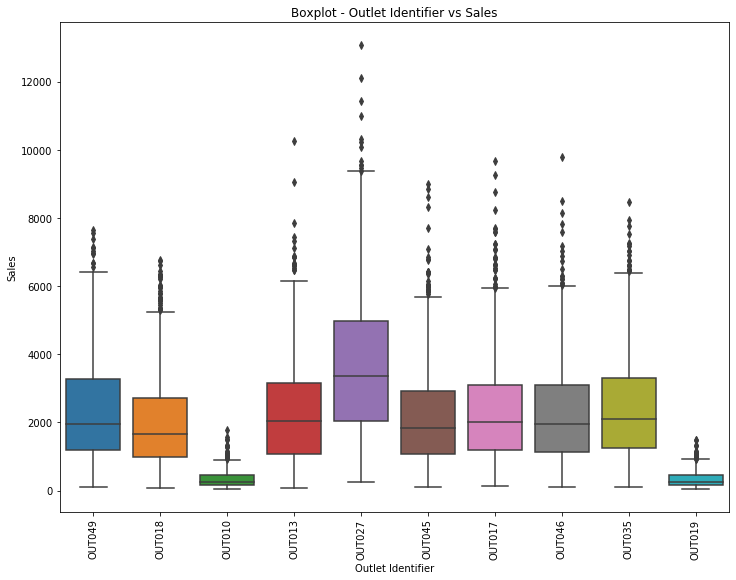

In [34]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet Identifier vs Sales")
plt.xlabel("Outlet Identifier")
plt.ylabel("Sales")
plt.show()

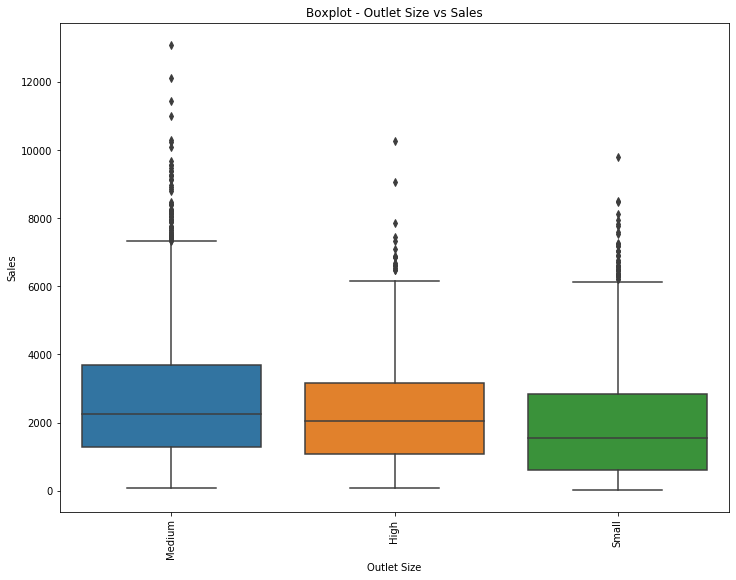

In [35]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet Size vs Sales")
plt.xlabel("Outlet Size")
plt.ylabel("Sales")
plt.show()

In [27]:
train.groupby("Outlet_Size")["Item_Outlet_Sales"].describe().T

Outlet_Size,High,Medium,Small
count,932.000000,2793.000000,2388.000000
mean,2298.995256,2681.603542,1912.149161
std,1533.531664,1855.210528,1582.370364
min,73.238000,69.243200,33.955800
25%,1072.603800,1270.346400,601.050950
50%,2050.664000,2251.069800,1544.656000
75%,3166.378350,3691.195200,2824.323600
max,10256.649000,13086.964800,9779.936200


In [15]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

Outlet_Size         High Medium                Small              
Outlet_Identifier OUT013 OUT027 OUT049 OUT018 OUT035 OUT046 OUT019
Outlet_Identifier    932    935    930    928    930    930    528

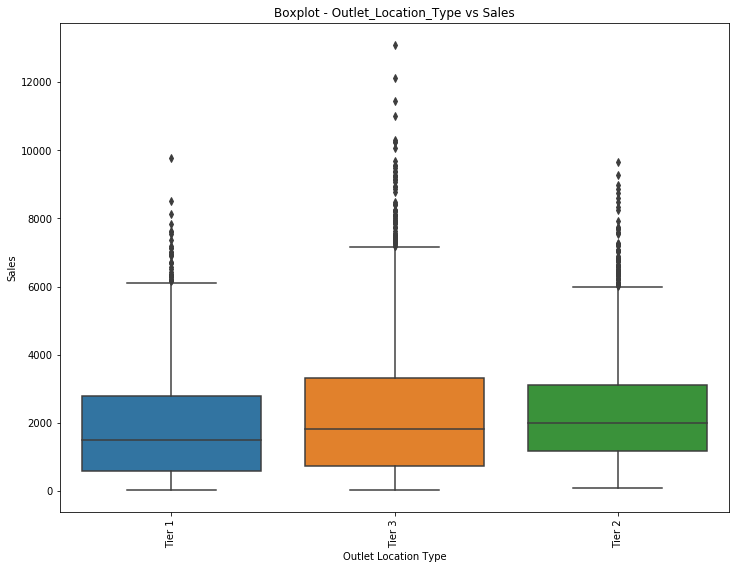

In [28]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet_Location_Type vs Sales")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.show()

In [39]:
# Missing Values

In [29]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [30]:
weightna = train[train.Item_Weight.isnull()]

In [31]:
weightna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [32]:
#combining the Dataset
combined = pd.concat([train,test], ignore_index = True, sort = False)

In [33]:
combined.isnull().sum()[combined.isnull().sum() != 0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [34]:
# missing value imputation - Item Weight / using lambda 
combined['Item_Weight'] = combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

In [35]:
train[train.Item_Identifier=="FDC14"]["Item_Weight"]

29       NaN
3609    14.5
4297    14.5
5760    14.5
6257     NaN
6346    14.5
6478    14.5
7031    14.5
Name: Item_Weight, dtype: float64

In [36]:
# Missing value Imputation
train.loc[29, "Item_Weight"]=train[train.Item_Identifier=="FDC14"]["Item_Weight"].median()

In [37]:
# Finding ID | np.where(train.Item_Weight.isna())
ids = train[pd.isnull(train.Item_Weight)]["Item_Identifier"]

In [38]:
locs = ids.index # Finding Index of the Item Weight Missing Values

In [39]:
# Missing Value Final Code
for i in range(0, len(ids)):
    train.loc[locs[i],"Item_Weight"]=train[train.Item_Identifier==ids.values[i]]["Item_Weight"].median()

In [40]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [49]:
train[train.Outlet_Size.isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [41]:
#missing values Item_visibility
visibilityna = train[train.Item_Visibility.isnull()]

In [42]:
visibilityna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [43]:
# missing value imputation - Item Visibility lambda
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0, value = x.median()))

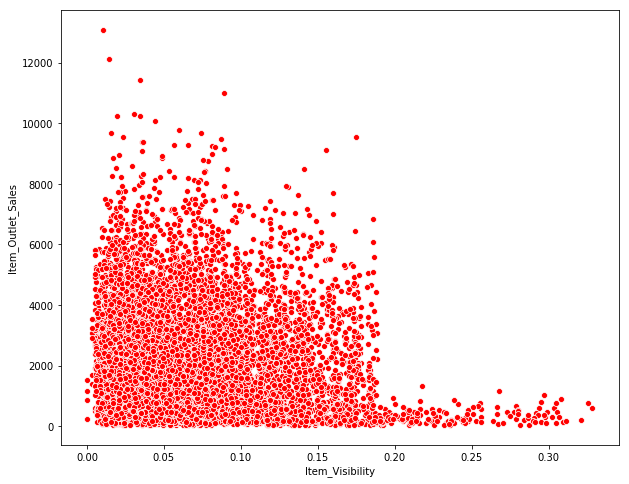

In [44]:
plt.figure(figsize = [10,8])
sns.scatterplot(combined["Item_Visibility"], combined["Item_Outlet_Sales"], color = 'r')
plt.show()

In [45]:
Y = pd.DataFrame(combined['Item_Visibility']==0)

In [46]:
combined[combined['Item_Visibility']=='FDX07']

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [47]:
# missing value imputation - Item Visibility lambda
X = combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.fillna(x.median()))

In [48]:
X.head()

0    0.016047
1    0.019278
2    0.016760
3    0.022914
4    0.013177
Name: Item_Visibility, dtype: float64

In [49]:
train[train.Item_Identifier== 'FDY07']["Item_Visibility"]

10      0.000000
651     0.000000
779     0.121848
3370    0.122290
4208    0.000000
4791    0.000000
6321    0.121501
Name: Item_Visibility, dtype: float64

In [50]:
# Imputation of FDY07
combined.loc[(combined.Item_Identifier== 'FDY07') & (combined["Item_Visibility"] != 0) ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
779,FDY07,11.8,Low Fat,0.121848,Fruits and Vegetables,46.8402,OUT045,2002,NaN,Tier 2,Supermarket Type1,597.2226
3370,FDY07,11.8,Low Fat,0.122290,Fruits and Vegetables,46.3402,OUT017,2007,NaN,Tier 2,Supermarket Type1,275.6412
6321,FDY07,11.8,Low Fat,0.121501,Fruits and Vegetables,46.8402,OUT013,1987,High,Tier 3,Supermarket Type1,413.4618


In [51]:
train[train.Item_Identifier== 'FDY07']["Item_Visibility"]

10      0.000000
651     0.000000
779     0.121848
3370    0.122290
4208    0.000000
4791    0.000000
6321    0.121501
Name: Item_Visibility, dtype: float64

In [52]:
# Imputation of FDY07
combined.loc[(combined.Item_Identifier== 'FDY07') & (combined["Item_Visibility"] != 0), "Item_Visibility"] = 0.0344

In [53]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
# size
pd.DataFrame(combined.groupby(["Outlet_Type", "Outlet_Location_Type"])["Outlet_Size"])

,0,1
0,"(Grocery Store, Tier 1)",23 Small 29 Small 49 Small 5...
1,"(Grocery Store, Tier 3)",3 NaN 28 NaN 30 NaN 45 ...
2,"(Supermarket Type1, Tier 1)",0 Medium 2 Medium 10 Mediu...
3,"(Supermarket Type1, Tier 2)",8 NaN 9 NaN 19 Small 2...
4,"(Supermarket Type1, Tier 3)",4 High 6 High 14 High 20 ...
5,"(Supermarket Type2, Tier 3)",1 Medium 5 Medium 16 Mediu...
6,"(Supermarket Type3, Tier 3)",7 Medium 18 Medium 21 Mediu...


In [58]:
S = pd.DataFrame(combined.groupby(["Outlet_Type", "Outlet_Location_Type"])["Outlet_Size"].value_counts())

In [59]:
S

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                880
Supermarket Type1 Tier 1               Medium              1550
                                       Small               1550
                  Tier 2               Small               1550
                  Tier 3               High                1553
Supermarket Type2 Tier 3               Medium              1546
Supermarket Type3 Tier 3               Medium              1559

In [60]:
# imputing Rule 2 Tier 2 and Supermarket Type 2 - small
combined.loc[(combined["Outlet_Location_Type"]== "Tier 2") & (combined["Outlet_Type"]== "Supermarket Type1 "), "Outlet_size"] = ['Small']

In [61]:
# imputing Rule 1 Tier 1 and Grocery Store - Medium
combined.loc[(combined["Outlet_Location_Type"]== "Tier 3") & (combined["Outlet_Type"]== "Grocery Store "), "Outlet_Size"] = ['Medium']

In [62]:
combined.isnull().sum()

Item_Identifier                  0
Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   4016
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales             5681
Outlet_size                  14204
dtype: int64

In [63]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Feature Engineering

1. Item Type -- convert Item_type in two category - perishables and Non- perishables

2. Price Per Unit - MRP/ Weight
 
3. Outlet Age = 2013 - Estalishment Year

4. From Item ID column --- FD (Food), NC (Non-Consumable), DR (Drinks) , etc,. (Extract Two code from ID)

In [64]:
# price per Unit
combined['Price_Per_Unit'] = combined['Item_MRP'] / combined['Item_Weight']

In [65]:
# Outlet Age
combined['Outlet_Age'] = 2013 - combined.Outlet_Establishment_Year

In [ ]:
# Item ID 


In [66]:
# Item Type Category
Perishable = ['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast', 'Breads','Seafood']

Non_Perishable = ['Household', 'Baking Goods', 'Frozen Foods','Health and Hygiene','Hard Drinks', 'Canned','Others', 'Hard Drinks', 'Canned']

In [67]:
# Function
def ItemType(x):
    if (x in Perishable):
        return("Perishable")
    else: 
        return('Non_Perishable') 

In [68]:
combined.Item_Type.apply(ItemType).head()

0        Perishable
1    Non_Perishable
2        Perishable
3        Perishable
4    Non_Perishable
Name: Item_Type, dtype: object

In [69]:
# np.where
np.where(combined.Item_Type.isin(Perishable), "Perishables", "Non_Perishabel")

array(['Perishables', 'Non_Perishabel', 'Perishables', ...,
       'Non_Perishabel', 'Non_Perishabel', 'Non_Perishabel'], dtype='<U14')

In [70]:
#loop
New_Item_Type = []
for i in range(0, len(combined)):
    if (combined.Item_Type[i] in Perishable):
        New_Item_Type.append("Perishable")
    else: 
        New_Item_Type.append('Non_Perishable') 
    

In [71]:
combined["New_Item_Type"] = pd.Series(New_Item_Type)

In [72]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Price_Per_Unit,Outlet_Age,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN,26.861204,14,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN,8.153581,4,Non_Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN,8.092457,14,Perishable
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN,9.484115,15,Perishable
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN,6.031512,26,Non_Perishable


In [73]:
str(combined.Item_Identifier[0])[:2]

'FD'

In [74]:
item_id = []
for i in combined.Item_Identifier:
    item_id.append(str(i)[:2])

In [75]:
combined["Item_IDS"]=pd.Series(item_id)

In [76]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Price_Per_Unit,Outlet_Age,New_Item_Type,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN,26.861204,14,Perishable,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN,8.153581,4,Non_Perishable,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN,8.092457,14,Perishable,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN,9.484115,15,Perishable,FD
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN,6.031512,26,Non_Perishable,NC


In [77]:
#Dropping the columns
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_size', 'Price_Per_Unit',
       'Outlet_Age', 'New_Item_Type', 'Item_IDS'],
      dtype='object')

In [78]:
new = combined.drop(['Item_Identifier','Item_MRP','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [79]:
new.shape

(14204, 12)

In [80]:
dummydata = pd.get_dummies(new)
dummydata.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Non_Perishable,New_Item_Type_Perishable,Item_IDS_DR,Item_IDS_FD,Item_IDS_NC
0,9.30,0.016047,3735.1380,26.861204,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,443.4228,8.153581,4,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,2097.2700,8.092457,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,732.3800,9.484115,15,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,994.7052,6.031512,26,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [81]:
dummydata.isnull().sum()

Item_Weight                         0
Item_Visibility                     0
Item_Outlet_Sales                5681
Price_Per_Unit                      0
Outlet_Age                          0
Item_Fat_Content_Low Fat            0
Item_Fat_Content_Regular            0
Outlet_Size_High                    0
Outlet_Size_Medium                  0
Outlet_Size_Small                   0
Outlet_Location_Type_Tier 1         0
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
New_Item_Type_Non_Perishable        0
New_Item_Type_Perishable            0
Item_IDS_DR                         0
Item_IDS_FD                         0
Item_IDS_NC                         0
dtype: int64

In [82]:
#split the data in train and test 
newtrain = dummydata[0:train.shape[0]]

In [83]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Non_Perishable,New_Item_Type_Perishable,Item_IDS_DR,Item_IDS_FD,Item_IDS_NC
0,9.30,0.016047,3735.1380,26.861204,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,443.4228,8.153581,4,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,2097.2700,8.092457,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,732.3800,9.484115,15,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,994.7052,6.031512,26,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [84]:
newtrain.shape

(8523, 22)

In [85]:
newtest = dummydata[8523:dummydata.shape[0]]

In [86]:
newtest.shape

(5681, 22)

In [87]:
newtest.drop('Item_Outlet_Sales',axis=1,inplace=True)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [88]:
newtest.columns

Index(['Item_Weight', 'Item_Visibility', 'Price_Per_Unit', 'Outlet_Age',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Type_Non_Perishable',
       'New_Item_Type_Perishable', 'Item_IDS_DR', 'Item_IDS_FD',
       'Item_IDS_NC'],
      dtype='object')

In [96]:
print(newtrain.shape)
print(newtest.shape)

(8523, 22)
(5681, 21)


# Data Preprocessing

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [93]:
scaled_train = pd.DataFrame(sc.fit_transform(newtrain),columns = newtrain.columns)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [101]:
scaled_test = pd.DataFrame(sc.fit_transform(newtest),columns = newtest.columns)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [102]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [103]:
gbm.fit(scaled_train, newtrain.Item_Outlet_Sales)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
gbm_pred = gbm.predict(scaled_test)

ValueError: Number of features of the model must match the input. Model n_features is 22 and input n_features is 21 